In [7]:
%run ../modules.ipynb
# Change this cell to change the kernel function throughout

#tutorial
sys.path.append('../0. kernel-tutorials/')
# Local Utilities for Notebook
from utilities.kernels import linear_kernel, gaussian_kernel
from utilities.general import load_variables, get_stats
from utilities.plotting import (
    plot_base, 
    plot_projection,
    plot_regression,
    plot_simple,
    get_cmaps,
    table_from_dict,
    check_mirrors,
)
cmaps = get_cmaps()
plt.style.use("../0. kernel-tutorials/utilities/kernel_pcovr.mplstyle")
dbl_fig = (2 * plt.rcParams["figure.figsize"][0], plt.rcParams["figure.figsize"][1])



../0. kernel-tutorials/utilities/colorbars.py:19: UserWarning: Trying to register the cmap 'cbarHot' which already exists.
  plt.register_cmap(cmap=self.cbar)
../0. kernel-tutorials/utilities/colorbars.py:19: UserWarning: Trying to register the cmap 'cbarBWR' which already exists.
  plt.register_cmap(cmap=self.cbar)
../0. kernel-tutorials/utilities/colorbars.py:35: UserWarning: Trying to register the cmap 'cbarPhi' which already exists.
  plt.register_cmap(cmap=self.cbar)
../0. kernel-tutorials/utilities/colorbars.py:19: UserWarning: Trying to register the cmap 'cbarHot_0.3_1.05' which already exists.
  plt.register_cmap(cmap=self.cbar)
../0. kernel-tutorials/utilities/colorbars.py:19: UserWarning: Trying to register the cmap 'bone_r_0.2_1.0' which already exists.
  plt.register_cmap(cmap=self.cbar)
../0. kernel-tutorials/utilities/colorbars.py:19: UserWarning: Trying to register the cmap 'Reds_0.3_1.0' which already exists.
  plt.register_cmap(cmap=self.cbar)
../0. kernel-tutorials/ut

In [8]:
#dataset load
len_dataset=79855
load_profile('egazzarr')
qb = QueryBuilder()
qb.append(orm.StructureData)

In [9]:
select=79854
qb_red=random.sample(qb.all(), select)

In [10]:
import periodictable
from periodictable import elements as el
n_el=20
el=list(el)
el[1:20]

[H, He, Li, Be, B, C, N, O, F, Ne, Na, Mg, Al, Si, P, S, Cl, Ar, K]

In [12]:
frames_ase=[]
br_l=[] #str
source=[] #id, ersion, db
sp_g=[] #int
partial=[] #bool
vol=[] #int
n_atoms=[]
norm_tot=np.zeros((select, len(el)))
start=0
n_operations=[]
yes_or_no=[]
syst=[]

point_group_list=[]

for [structure_data],i in zip(qb_red, range(select)):
    
    if 'spacegroup_number' in structure_data.extras:
        
        sg=structure_data.extras['spacegroup_number']
        natom = len(structure_data.get_site_kindnames())
        frame=structure_data.get_ase()
        frame.wrap(eps=1e-12)
        frames_ase.append(frame)
        n_atoms.append(natom)
        if natom %4==0:
            
            yes_or_no. append(1)
        else:
            yes_or_no.append(0)
        s=structure_data.extras['source']
        source.append(s)
        bl=structure_data.extras['bravais_lattice']
        br_l.append(bl)
        syst.append(system(bl))
       

AxesSubplot(0.125,0.125;0.775x0.755)


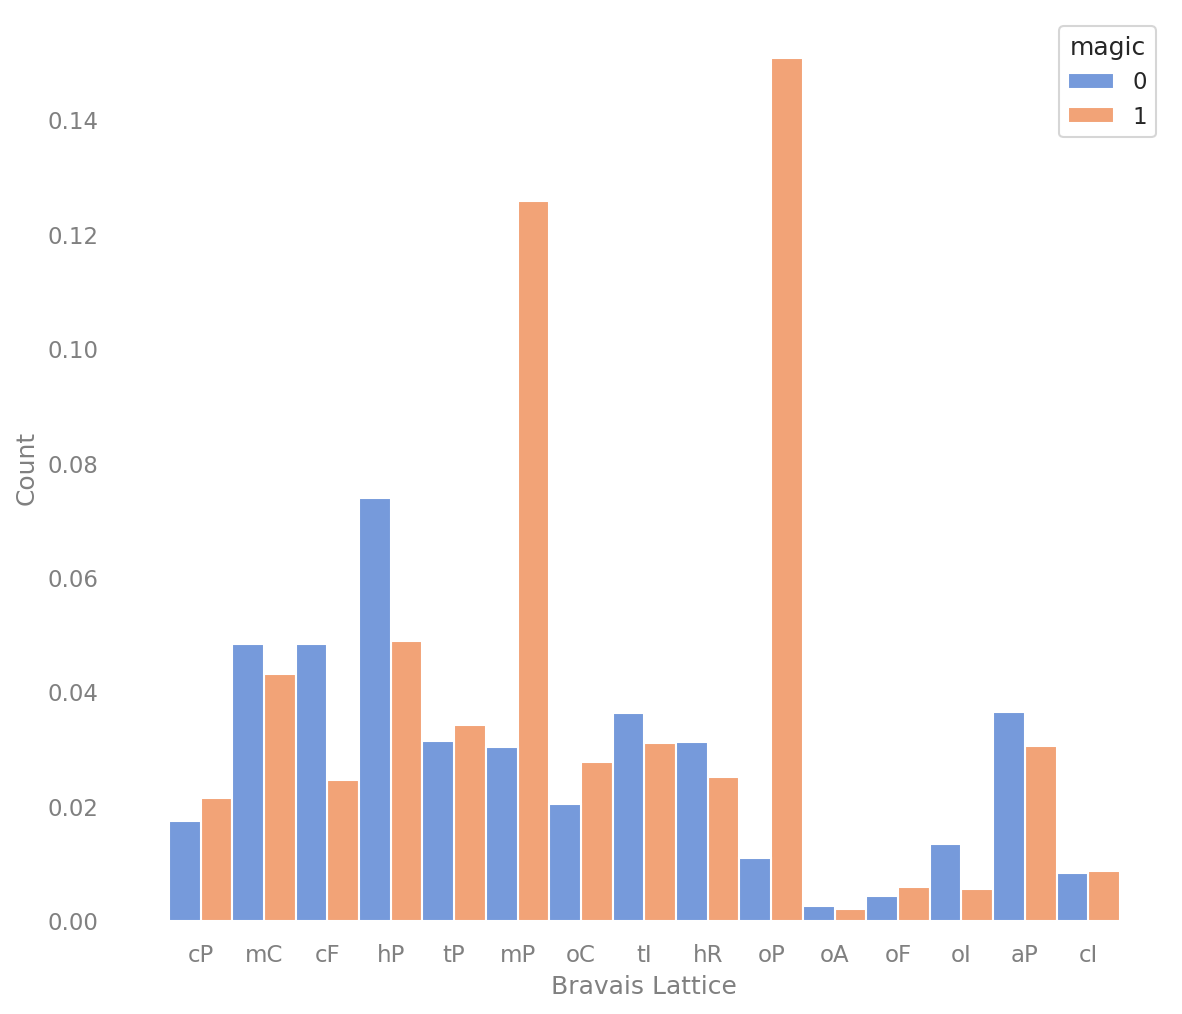

In [19]:

dict={'bravais_lattice':br_l, 
      'system':syst,'natom': n_atoms,  'magic':yes_or_no} 
df= pd.DataFrame(dict)

geo_data=df[['natom', 'bravais_lattice', 'magic']]
f, ax = plt.subplots(figsize=(9, 8))
sns.set(style="white", palette="muted", color_codes=True)
sns.despine(left=True, bottom=True)
# stat{“count”, “frequency”, “density”, “probability”}

#     Aggregate statistic to compute in each bin.

#         count shows the number of observations

#         frequency shows the number of observations divided by the bin width

#         density normalizes counts so that the area of the histogram is 1

#         probability normalizes counts so that the sum of the bar heights is 1


y=sns.histplot(data=geo_data, x='bravais_lattice', hue='magic', stat='density', multiple='dodge')
plt.xticks(c='grey')
plt.yticks(c='grey')
plt.ylabel('Count', c='grey')
plt.xlabel('Bravais Lattice', c='grey')
print(y)

0.58580659704 0.41419340296 ['cubic' 'monoclinic' 'hexagonal' 'tetragonal' 'orthorhombic' 'trigonal'
 'triclinic']


Text(0.5, 0, 'Magic abundance')

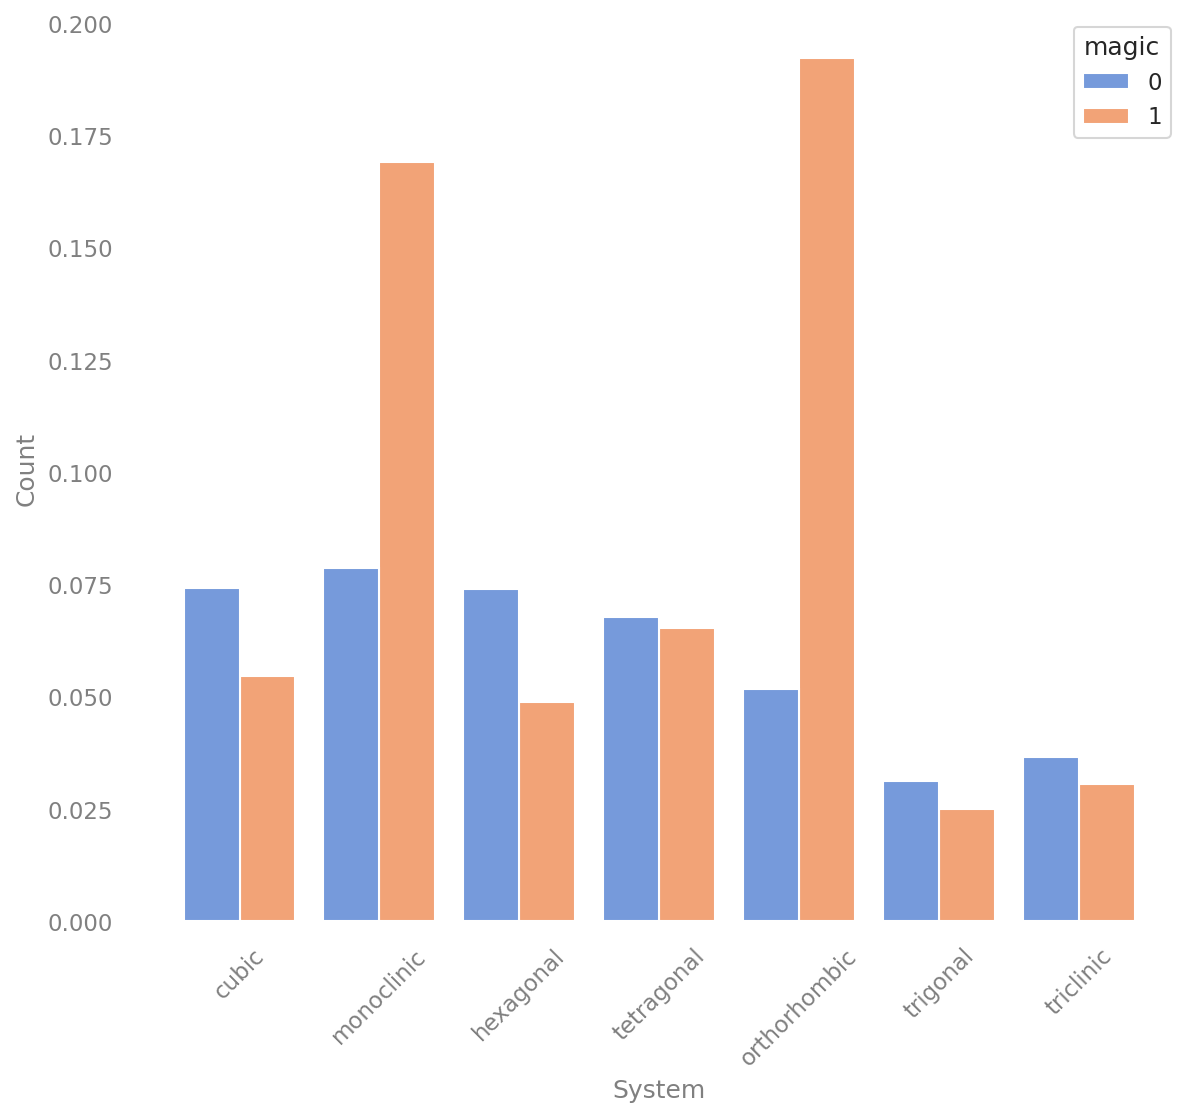

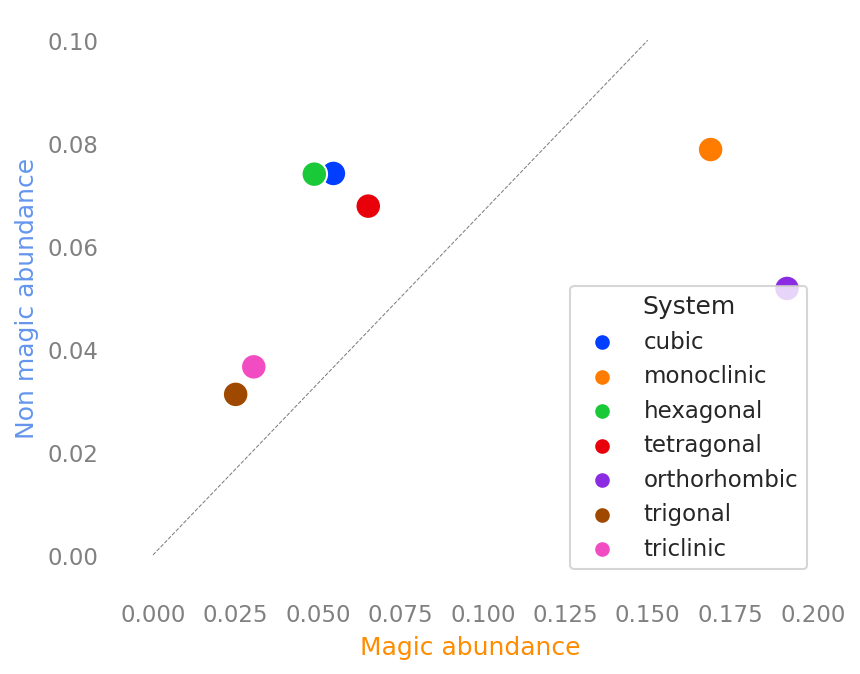

In [25]:
f, ax = plt.subplots(figsize=(9, 8))
sns.set(style="white", palette="muted", color_codes=True)
sns.despine(left=True, bottom=True)
g=sns.histplot(data=df, x='system', hue='magic', stat='density', multiple='dodge', shrink=.8)
plt.xticks(c='grey', rotation=45)
plt.yticks(c='grey')
plt.ylabel('Count', c='grey')
plt.xlabel('System', c='grey')

height=([h.get_height() for h in g.patches])

pg_m=height[0:int(len(height)/2)]
pg_nm=height[int(len(height)/2):int(len(height))]
pg_list=(df['system'].unique())
dict={'m_abd':pg_m, 'nm_abd':pg_nm, 'System':pg_list}
pg= pd.DataFrame(dict)
print(sum(pg_m), sum(pg_nm), pg_list)



Text(0.5, 0, 'Magic abundance')

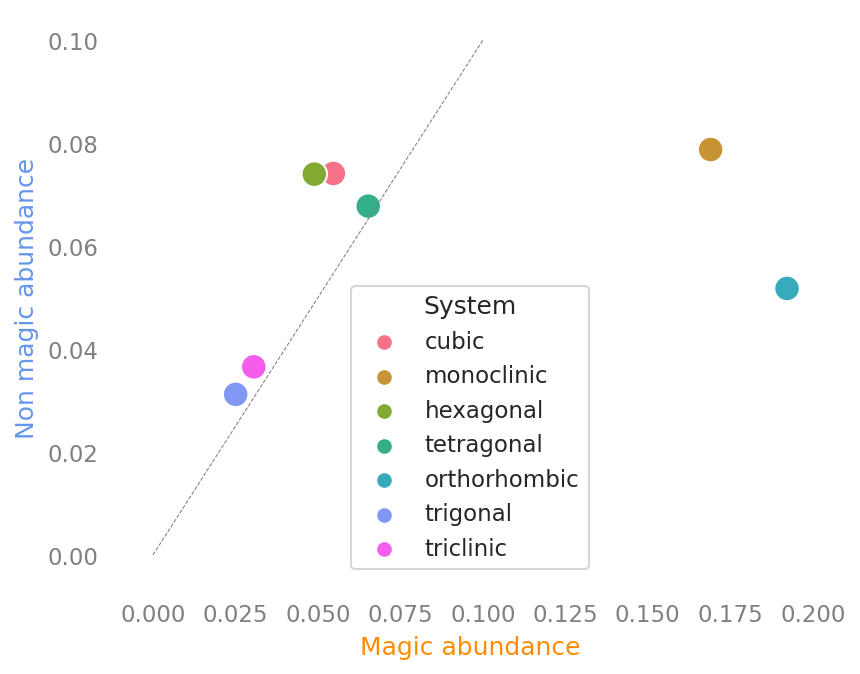

In [31]:
f, ax = plt.subplots(figsize=(6,5))
sns.despine(left=True, bottom=True)
plt.plot([0,0.1], [0,0.10], linestyle='--',lw=0.5, c='grey')
sns.scatterplot(data=pg, x="m_abd", y="nm_abd", s=150, hue="System", palette='husl')
plt.xticks(c='grey')
plt.yticks(c='grey')
# for i in range(len(pg_list)):
#     plt.annotate(pg_list[i], (pg_m[i], pg_nm[i]), size=10, color='grey')
plt.ylabel('Non magic abundance', c='cornflowerblue')
plt.xlabel('Magic abundance', c='darkorange')